## Baseline Model Testing

Our group chose an SVM model to be our baseline, due to its widespread use before the introduction of deep learning. The feature extraction for this model is simple - we compress each image's pixel values into a vector, which then becomes the feature that the SVM trains on.

In [ ]:
#Library imports

import pandas as pd
from sklearn import svm
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [ ]:
#Extracting zip file of images into same directory

import zipfile

zip_file = 'garbage.zip'

extract_path = ''

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

FileNotFoundError: [Errno 2] No such file or directory: 'garbage.zip'

### Data preprocessing

In [ ]:
ls

 Volume in drive A is New Volume
 Volume Serial Number is C8C5-1642

 Directory of A:\Github

11/29/2023  09:34 PM    <DIR>          .
11/16/2023  01:12 PM    <DIR>          .ipynb_checkpoints
09/27/2022  07:58 PM    <DIR>          AI for Trading
11/29/2023  11:49 AM    <DIR>          augmented
11/28/2023  11:56 PM       291,674,459 augmented.zip
11/29/2023  09:34 PM           398,738 Baseline - SVM Image Classification.ipynb
01/29/2023  07:16 PM            13,152 Correlation FinTorch.ipynb
10/07/2023  07:36 PM           203,409 Data Visualization.ipynb
09/29/2023  03:36 PM            34,853 DataScience_Answers.ipynb
11/03/2023  06:49 PM           270,876 dataset-annotation.txt
11/03/2023  06:50 PM           104,357 dataset-split.sh
04/09/2023  08:25 PM    <DIR>          ECE243---Pong-Project
10/08/2022  04:09 PM    <DIR>          ECE244
05/01/2023  01:58 PM    <DIR>          ECE297---Mapping-101-4
01/08/2023  02:29 PM    <DIR>          fintorch-backend
10/27/2023  05:26 PM    <DIR>   

In [ ]:
#Loading dataset into pandas dataframe
categories = ['battery', 'biological', 'cardboard', 'clothes', 'shoes', 'glass', 'paper', 'plastic', 'metal', 'trash']

data = []
label = []

for index, cat in enumerate(categories):
    datadir = 'augmented/' + cat
    files = os.listdir(datadir)
    for img in files[:75]:
        img_array = imread(os.path.join(datadir,img))
        img_array = resize(img_array,(150, 150, 3))

        data.append(img_array.flatten())
        label.append(index)
    print("Loaded category " + cat)

Loaded category battery
Loaded category biological
Loaded category cardboard
Loaded category clothes
Loaded category shoes
Loaded category glass
Loaded category paper
Loaded category plastic
Loaded category metal
Loaded category trash


In [ ]:
data = np.array(data)

In [ ]:
label = np.array(label)

In [ ]:
df = pd.DataFrame(data)
df["Label"] = label

In [ ]:
#Our data array
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Label
0,0.741176,0.784314,0.807843,0.741176,0.784314,0.807843,0.741176,0.784314,0.807843,0.741177,...,0.653933,0.697070,0.720599,0.649961,0.693098,0.716123,0.646330,0.689467,0.711059,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,0.610773,0.626459,0.661753,0.610211,0.625897,0.661191,0.624305,0.639991,0.675286,0.605654,...,0.319283,0.312614,0.305686,0.362449,0.357759,0.352220,0.362601,0.354998,0.358200,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999031,0.999031,0.999031,0.999031,0.999031,0.999031,0.999031,0.999031,0.999031,9
746,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9
747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9
748,0.733333,0.807843,0.592157,0.733333,0.807843,0.592157,0.733333,0.807843,0.592157,0.733333,...,0.733333,0.807843,0.592157,0.733333,0.807843,0.592157,0.733333,0.807843,0.592157,9


In [ ]:
#getting our train-test-split
from sklearn.model_selection import train_test_split

#image data
x=df.iloc[:,:-1]

#label
y=df.iloc[:,-1]

#We will do an 80-20 split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
#perform the training
model = svm.SVC(degree=3, gamma='scale', kernel='rbf')

#train model
model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.46

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 5,  0,  1,  1,  0,  3,  2,  1,  1,  1],
       [ 1,  5,  2,  4,  1,  0,  1,  0,  0,  1],
       [ 0,  1,  8,  2,  0,  2,  1,  0,  1,  0],
       [ 0,  1,  0, 12,  1,  0,  1,  0,  0,  0],
       [ 2,  0,  1,  7,  1,  1,  1,  1,  0,  1],
       [ 0,  1,  0,  1,  0, 12,  0,  0,  0,  1],
       [ 2,  1,  2,  3,  0,  0,  5,  0,  0,  2],
       [ 0,  0,  0,  3,  0,  1,  3,  4,  0,  4],
       [ 1,  0,  0,  0,  1,  0,  0,  2,  6,  5],
       [ 0,  0,  0,  0,  2,  0,  0,  1,  1, 11]], dtype=int64)

Confusion matrix, without normalization


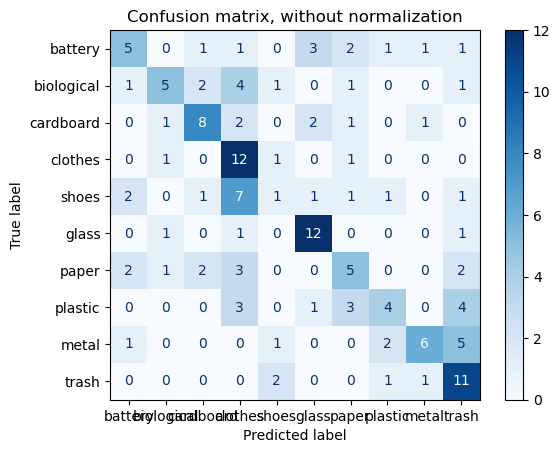

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix

title = "Confusion matrix, without normalization"

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    display_labels=categories,
    cmap=plt.cm.Blues,
    normalize=None
)
disp.ax_.set_title(title)
print(title)

plt.show()

In [ ]:
# Save the model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

### Testing Phase With Custom Images

In [ ]:
import pickle

# Load the model from the file
with open('svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

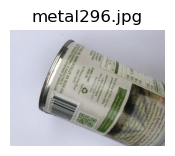

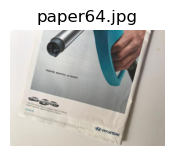

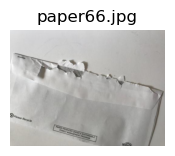

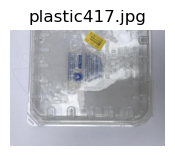

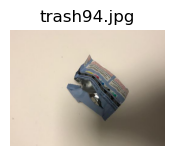

In [ ]:
directory = 'svm_testing_images'

testing_data = []
img_data = []

for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(directory, filename)
        img = imread(img_path)
        img_data.append(img)
        img_array = resize(img,(150, 150, 3))
        testing_data.append(img_array.flatten())

        plt.figure(figsize=(2,2))
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
        plt.show()

The labels for these images are in their names. We will perform a test on these images, and see how the SVM performs on them.

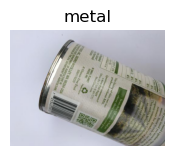

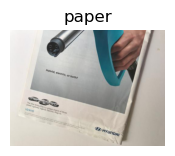

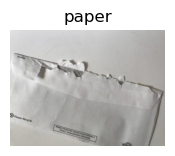

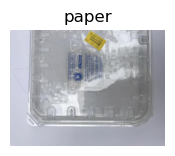

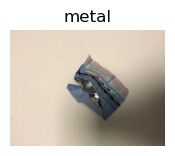

In [ ]:
for val, data in enumerate(testing_data):
    pred = loaded_model.predict(data.reshape(1,-1))
    plt.figure(figsize=(2,2))
    plt.imshow(img_data[val])
    plt.title(categories[pred[0]])
    plt.axis('off')
    plt.show()

The SVM performs quite poorly on this dataset, managing only a 46% accuracy rate. We will see if our deep learning model can provide a larger improvement on this.